In [218]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from collections import Counter
import pandas as pd
# from ipynb.fs.full.id3_tests import reassign_classes
def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

In [219]:
# START OF WINE SECTION
# X:
# 0. FIXED_ACIDITY
# 1. VOLATILE_ACIDITY
# 2. CITRIC_ACID
# 3. RESIDUAL_SUGAR
# 4. CHLORIDES
# 5. FREE_SULFUR_DIOXIDE
# 6. TOTAL_SULFUR_DIOXIDE
# 7. DENSITY
# 8. PH
# 9. SULPHATES
# 10. ALCOHOL
# y - classes: 0 - below 6 ; 1 - over 5


In [223]:
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality)
y = reassign_classes(y)

In [224]:
ranges = np.zeros([11,2])
for i in range(X.shape[1]):
    ranges[i,0] = min(X[:,i])
    ranges[i,1] = max(X[:,i])
    print(f" Values for {i}. min {min(X[:,i])} , max: {max(X[:,i])}")
#print(ranges)
# print(X[:,0])

 Values for 0. min 3.8 , max: 15.9
 Values for 1. min 0.08 , max: 1.58
 Values for 2. min 0.0 , max: 1.66
 Values for 3. min 0.6 , max: 65.8
 Values for 4. min 0.009 , max: 0.611
 Values for 5. min 1.0 , max: 289.0
 Values for 6. min 6.0 , max: 440.0
 Values for 7. min 0.98711 , max: 1.03898
 Values for 8. min 2.72 , max: 4.01
 Values for 9. min 0.22 , max: 2.0
 Values for 10. min 8.0 , max: 14.9


In [226]:
def show_wine_data_scattering(number_of_sections):
    for i in range(X.shape[1]):
        labels = []
        values = []
        [mini, maxi] = ranges[i,:]
        step = (maxi - mini) / number_of_sections
        for k in range(number_of_sections):
            labels.append(f"{(mini+k*step):.3f}")
            values.append(sum(1 for x in X[:,i] if x <= mini+k*step))
        # print(values)
        for j in range(len(values)-1):
            values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
        # print(labels)
        # print(values)
        label_step = len(labels)//5
        act_labels = [" "*t for t in range(len(labels))]
        for t in range(5):
            act_labels[t*label_step] = labels[t*label_step]
        act_labels[-1] = f"{(ranges[i,1]):.3f}"
        plt.bar(act_labels, values)
        plt.title(f'{i}.')
        plt.xlabel('Ranges')
        plt.ylabel('Count')
        plt.show()

[[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
   0.56    9.4   ]
 [ 7.8     0.88    0.      2.6     0.098  25.     67.      0.9968  3.2
   0.68    9.8   ]]
[0, 0]


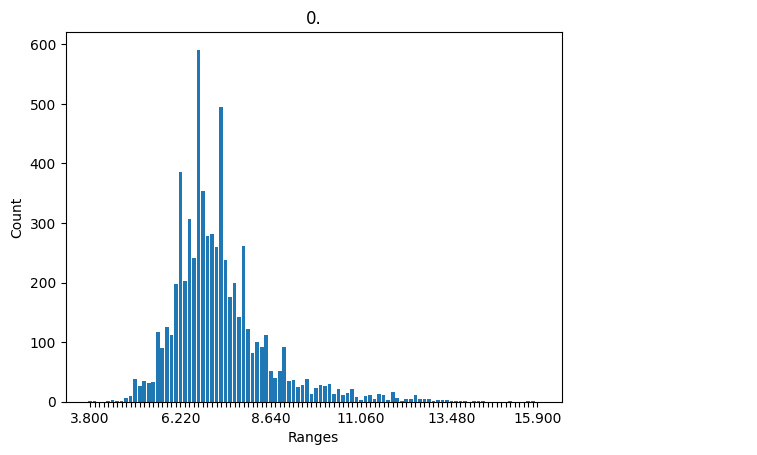

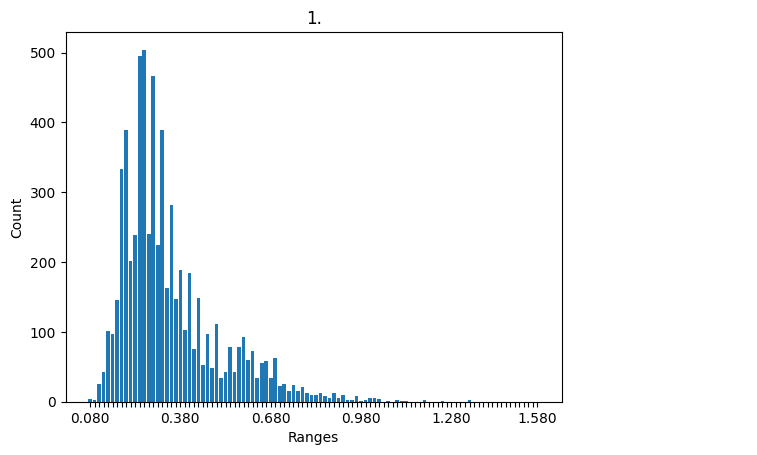

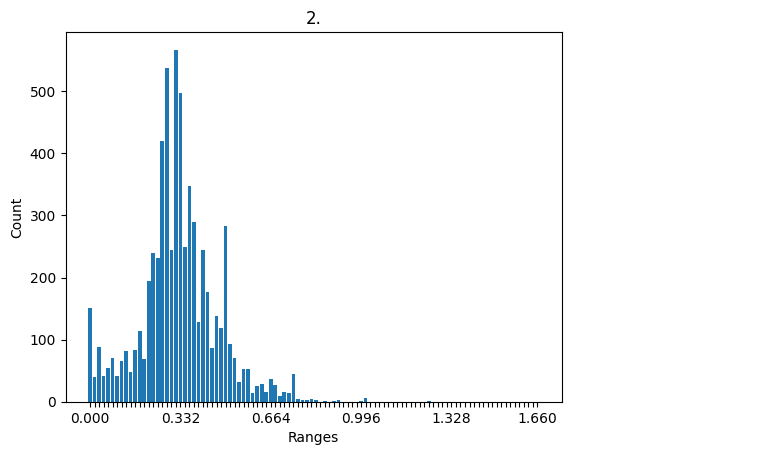

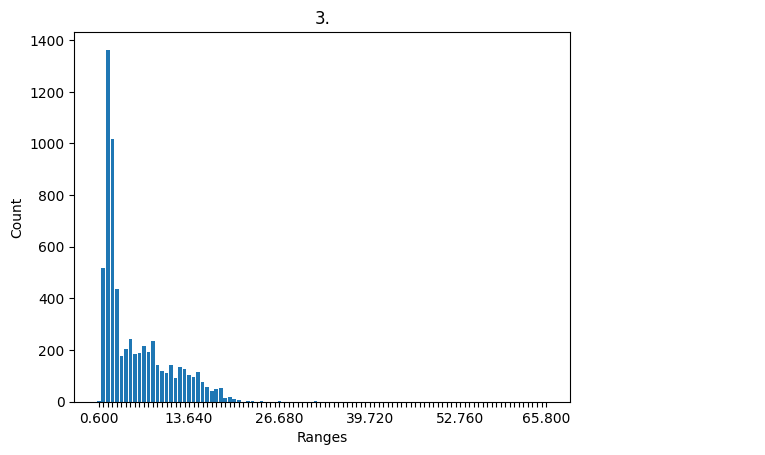

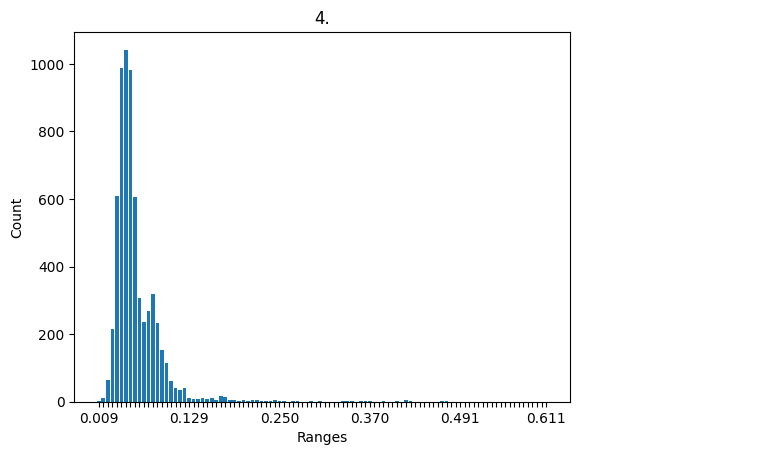

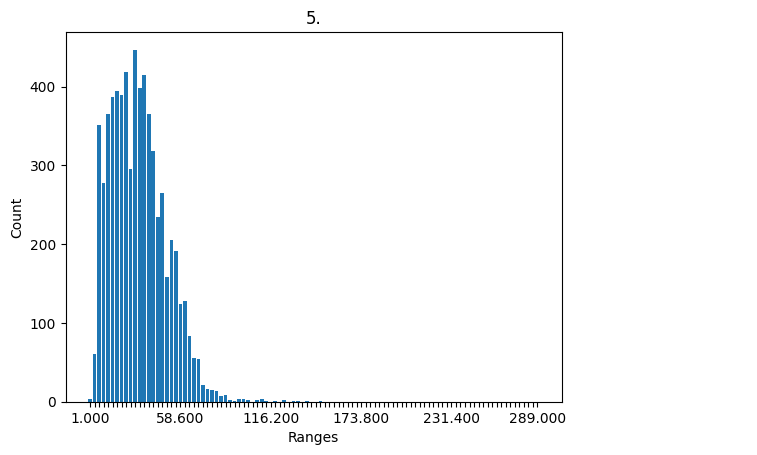

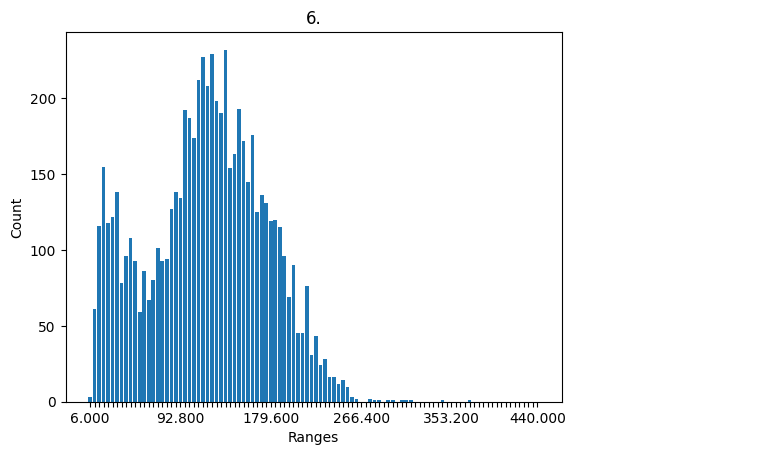

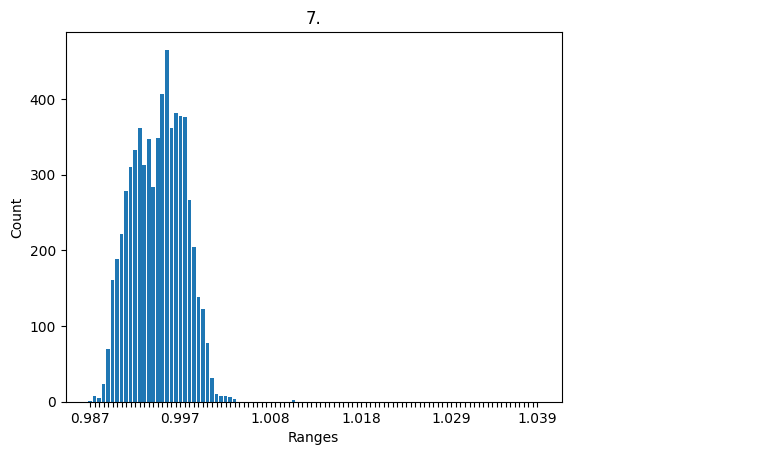

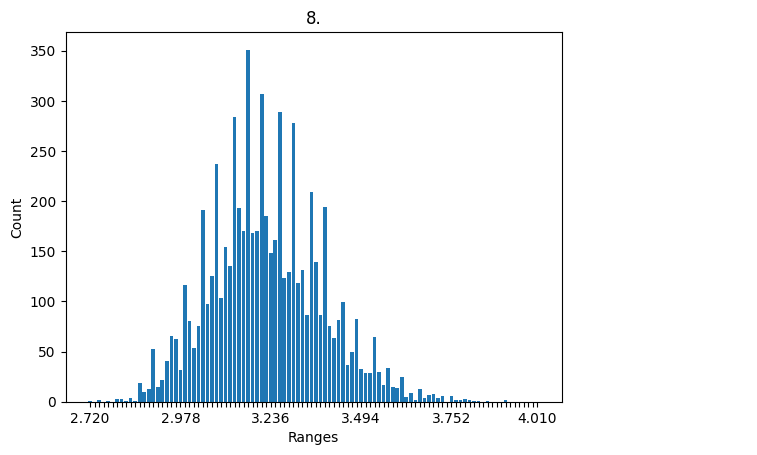

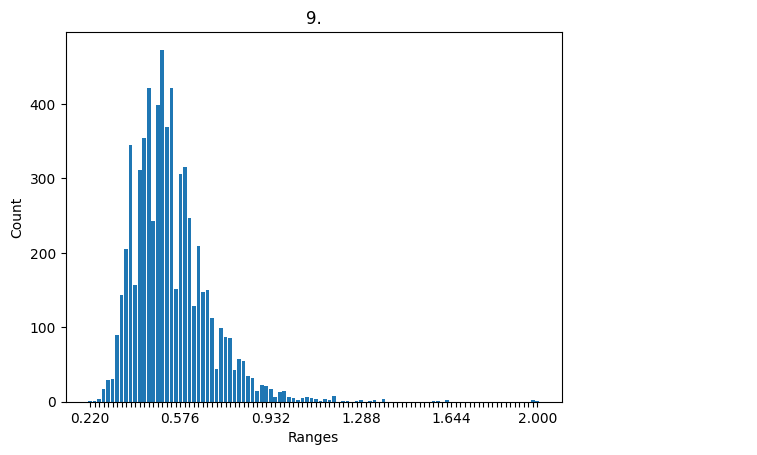

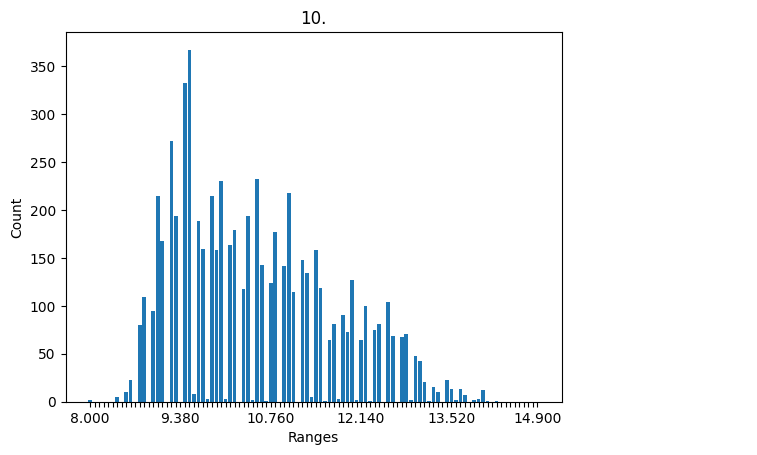

In [227]:
print(X[:2,:])
print(y[:2])
show_wine_data_scattering(100)

In [228]:
# START OF HEALTHCARE SECTION
# X1:
# 0. AGE
# 1. GENDER
# 2. BLOOD_TYPE
# 3. MEDICAL_CONDITION
# 4. INSURANCE_PROVIDER
# 5. BILLING_AMOUNT
# 6. ADMISSION_TYPE
# 7. MEDICATION
# 8. TIME_AT_HOSPITAL
# y - classes: 0 - abnormal ; 1 - normal ; 2 - inconclusive

In [229]:
data = pd.read_csv("../data/healthcare_dataset.csv")
data = np.array(data)
data_cut = np.array(data[:, :10])
# data_cut |age|gender|blood_type|medical_condition|insurance_provider|billing_amount|admission_type|medication|time_at_hospital|test_result|

# 0. AGE
data_cut[:,0] = data[:,1]
# 1. GENDER
data_cut[:,1] = data[:,2]
# 2. BLOOD_TYPE
data_cut[:,2] = data[:,3]
# 3. MEDICAL_CONDITION
data_cut[:,3] = data[:,4]
# 4. INSURANCE_PROVIDER
data_cut[:,4] = data[:,8]
# 5. BILLING_AMOUNT
d = data[:,9]
d[d<0] = 0
data_cut[:,5] = d
# 6. ADMISSION_TYPE
data_cut[:,6] = data[:,11]
# 7. MEDICATION
data_cut[:,7] = data[:,13]
# 8. TIME_AT_HOSPITAL
for i in range(data.shape[0]):
    time_in_days = datetime.strptime(data[i,12], "%Y-%m-%d") - datetime.strptime(data[i,5], "%Y-%m-%d")
    time_in_days = int(time_in_days.days)
    data_cut[i,8] = time_in_days

# 9. TEST_RESULT
data_cut[:,9] = data[:,14]

print(data_cut[:4,:])


[[30 'Male' 'B-' 'Cancer' 'Blue Cross' 18856.281305978155 'Urgent'
  'Paracetamol' 2 'Normal']
 [62 'Male' 'A+' 'Obesity' 'Medicare' 33643.327286577885 'Emergency'
  'Ibuprofen' 6 'Inconclusive']
 [76 'Female' 'A-' 'Obesity' 'Aetna' 27955.096078842456 'Emergency'
  'Aspirin' 15 'Normal']
 [28 'Female' 'O+' 'Diabetes' 'Medicare' 37909.78240987528 'Elective'
  'Ibuprofen' 30 'Abnormal']]


In [230]:
X1 = data_cut[:,:9]
y1 = data_cut[:,9]
y1[y1=="Abnormal"] = 0
y1[y1=="Normal"] = 1
y1[y1=="Inconclusive"] = 2


In [231]:
def show_healthcare_data_scattering(number_of_sections):
    i = 0
    [mini0, maxi0] = min(data_cut[:,0]), max(data_cut[:,0])
    labels = []
    values = []
    step = (maxi0 - mini0) / number_of_sections
    for k in range(number_of_sections):
        labels.append(f"{(mini0+k*step):.1f}")
        values.append(sum(1 for x in data_cut[:,0] if x <= mini0+k*step))
        # print(values)
    for j in range(len(values)-1):
        values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
    # print(labels)
    # print(values)
    label_step = len(labels)//5
    act_labels = [" "*t for t in range(len(labels))]
    for t in range(5):
        act_labels[t*label_step] = labels[t*label_step]
    act_labels[-1] = f"{maxi0:.1f}"
    plt.bar(act_labels, values)
    plt.title(f'{i}.')
    plt.xlabel('Ranges')
    plt.ylabel('Count')
    plt.show()
    for i in range(1,5):
        [labels, values] = np.unique(data_cut[:,i], return_counts=True)
        plt.bar(labels, values)
        plt.title(f'{i}.')
        plt.xlabel('Ranges')
        plt.ylabel('Count')
        plt.show()
    i = 5
    [mini5, maxi5] = min(data_cut[:,5]), max(data_cut[:,5])
    labels = []
    values = []
    step = (maxi5 - mini5) / number_of_sections
    for k in range(number_of_sections):
        labels.append(f"{(mini5+k*step):.1f}")
        values.append(sum(1 for x in data_cut[:,5] if x <= mini5+k*step))
        # print(values)
    for j in range(len(values)-1):
        values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
    # print(labels)
    # print(values)
    label_step = len(labels)//5
    act_labels = [" "*t for t in range(len(labels))]
    for t in range(5):
        act_labels[t*label_step] = labels[t*label_step]
    act_labels[-1] = f"{maxi5:.1f}"
    plt.bar(act_labels, values)
    plt.title(f'{i}.')
    plt.xlabel('Ranges')
    plt.ylabel('Count')
    plt.show()
    for i in range(6,8):
        [labels, values] = np.unique(data_cut[:,i], return_counts=True)
        plt.bar(labels, values)
        plt.title(f'{i}.')
        plt.xlabel('Ranges')
        plt.ylabel('Count')
        plt.show()
    i = 8
    [mini8, maxi8] = min(data_cut[:,8]), max(data_cut[:,8])
    labels = []
    values = []
    step = (maxi8 - mini8) / number_of_sections
    for k in range(number_of_sections):
        labels.append(f"{(mini8+k*step):.1f}")
        values.append(sum(1 for x in data_cut[:,8] if x <= mini8+k*step))
        # print(values)
    for j in range(len(values)-1):
        values[len(values)-1-j] = values[len(values)-1-j] - values[len(values)-2-j]
    # print(labels)
    # print(values)
    label_step = len(labels)//5
    act_labels = [" "*t for t in range(len(labels))]
    for t in range(5):
        act_labels[t*label_step] = labels[t*label_step]
    act_labels[-1] = f"{maxi8:.1f}"
    plt.bar(act_labels, values)
    plt.title(f'{i}.')
    plt.xlabel('Ranges')
    plt.ylabel('Count')
    plt.show()

[[30 'Male' 'B-' 'Cancer' 'Blue Cross' 18856.281305978155 'Urgent'
  'Paracetamol' 2]
 [62 'Male' 'A+' 'Obesity' 'Medicare' 33643.327286577885 'Emergency'
  'Ibuprofen' 6]]
[1 2 1 0 0 1]


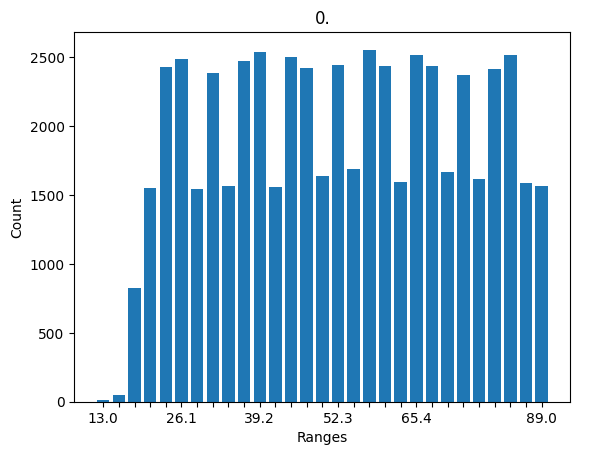

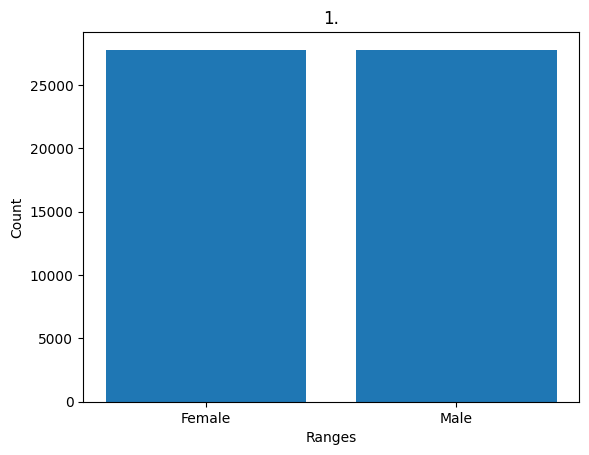

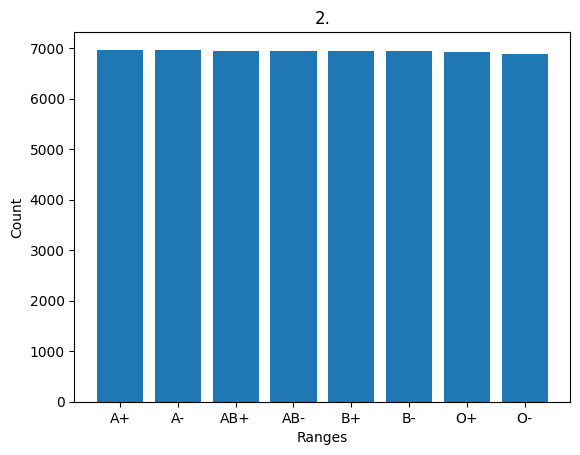

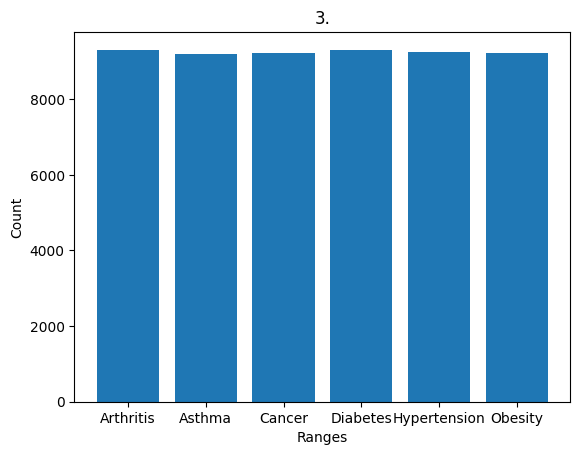

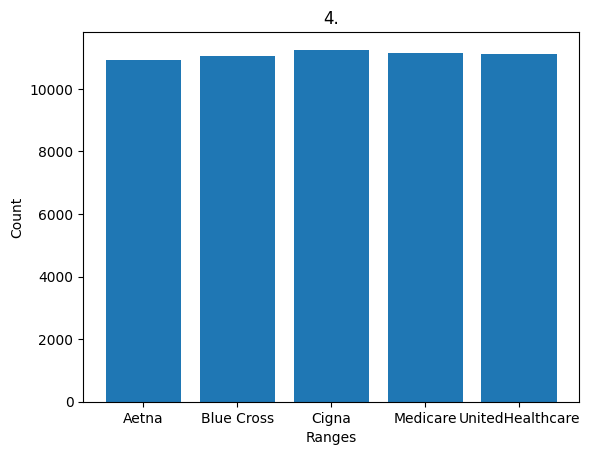

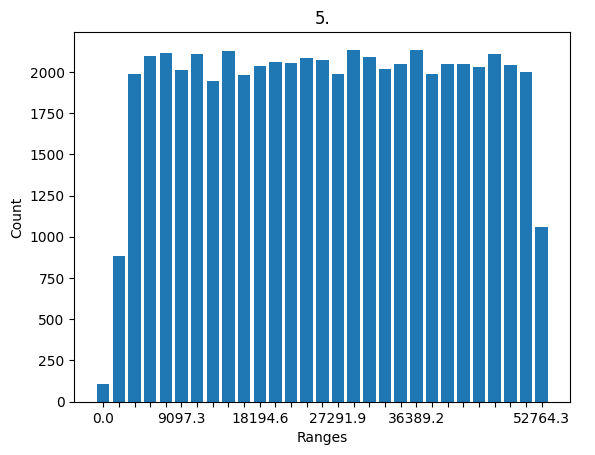

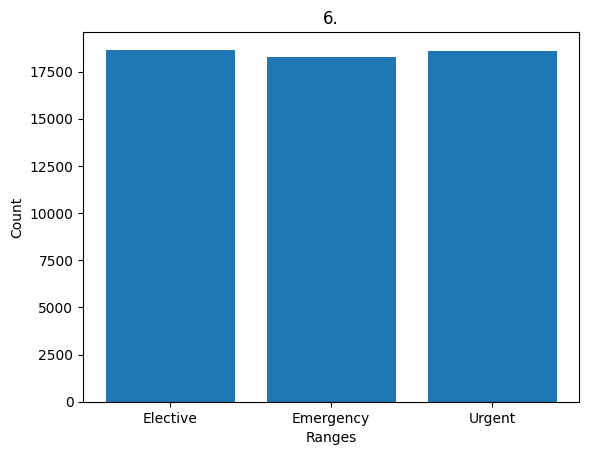

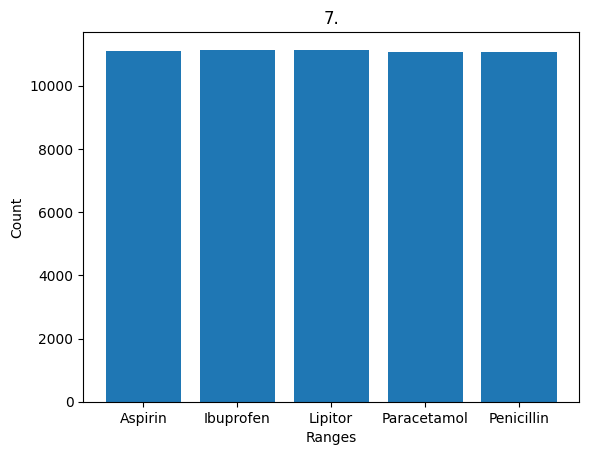

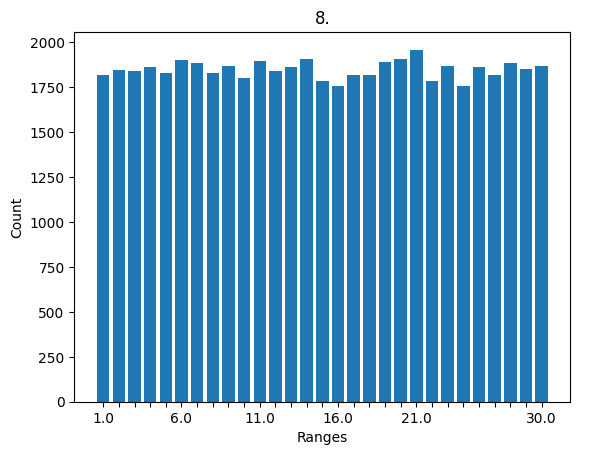

In [232]:
print(X1[:2,:])
print(y1[:6])
show_healthcare_data_scattering(29)

In [ ]:
# START OF CREDIT SCORE SECTION
# X2:
# 0. AGE
# 1. ANNUAL_INCOME
# 2. MONTHLY_INHAND_SALARY
# 3. INTEREST_RATE
# 4. NUM_OF_LOAN
# 5. BILLING_AMOUNT
# 6. DELAY_FROM_DUE_DATE
# 7. NUM_OF_DELAYED_PAYMENT
# 8. NUM_CREDIT_INQUIRIES
# 9. OUTSTANDING_DEBT
# 10. CREDIT_UTILIZATION_RATIO
# 11. CREDIT_HISTORY_AGE
# 12. TOTAL_EMI_PER_MONTH
# 13. AMOUNT_INVESTED_MONTHLY
# 14. MONTHLY_BALANCE
# y2 - classes: 0 - poor ; 1 - standard ; 2 - good